# Analyzing Shakespeare

This exercise is an introduciton to natural language processing using python. We will be analyzing the most frequently appearing words in one of the books found from [project Gutenberg](https://www.gutenberg.org/) — Shakespeare's Hamlet.

We will be using a python library called [nltk](https://www.nltk.org/) (Natural language toolkit), which has some really useful features when it comes to learning natural language processing. For this exercise, we need to choose a [corpus](https://en.wikipedia.org/wiki/Text_corpus), which is essentially a language resource that consists of a collection of texts. For this exercise, we will use texts from project Gutenberg. Luckily the nltk-library can provide us with a collection of texts from project Gutenberg. 

## Choosing the sample

Let's begin to explore the world of natural language processing by browsing the project Gutenberg's book collection available on nltk.corpus -library. For this, we need to import gutenberg-package from the mentioned library.

In [1]:
from nltk.corpus import gutenberg

# Print a list of available books from project Gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

As we can see there are quite a few books in our corpus. Let's pick 'shakespeare-hamlet.txt', for further analysis.

We can use words()-, sents()- and raw()-methods from the gutenberg package to get the words, sentences and raw text from our book. More information from gutenberg corpus package can be founds [here](https://www.nltk.org/book/ch02.html#gutenberg-corpus).

In [2]:
words = gutenberg.words('shakespeare-hamlet.txt')  # Get words 
sentences = gutenberg.sents('shakespeare-hamlet.txt') # Get sentences
sample = gutenberg.raw('shakespeare-hamlet.txt')  # Get raw text

Let's see what is inside those variables

In [3]:
print("Words:", words)
print()
print("Sentences:", sentences)

Words: ['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', ...]

Sentences: [['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']'], ['Actus', 'Primus', '.'], ...]


In [4]:
# Uncomment the following line to read Hamlet
#print(sample)

Now, try playing around with each variables we defined so far.

In [5]:
# Let's check the final 50 words
words[:50]

['[',
 'The',
 'Tragedie',
 'of',
 'Hamlet',
 'by',
 'William',
 'Shakespeare',
 '1599',
 ']',
 'Actus',
 'Primus',
 '.',
 'Scoena',
 'Prima',
 '.',
 'Enter',
 'Barnardo',
 'and',
 'Francisco',
 'two',
 'Centinels',
 '.',
 'Barnardo',
 '.',
 'Who',
 "'",
 's',
 'there',
 '?',
 'Fran',
 '.',
 'Nay',
 'answer',
 'me',
 ':',
 'Stand',
 '&',
 'vnfold',
 'your',
 'selfe',
 'Bar',
 '.',
 'Long',
 'liue',
 'the',
 'King',
 'Fran',
 '.',
 'Barnardo']

In [6]:
# How many words do we have ?
len(words)

37360

In [7]:
# Check the final 10 sentences
sentences[:10]

[['[',
  'The',
  'Tragedie',
  'of',
  'Hamlet',
  'by',
  'William',
  'Shakespeare',
  '1599',
  ']'],
 ['Actus', 'Primus', '.'],
 ['Scoena', 'Prima', '.'],
 ['Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', '.'],
 ['Barnardo', '.'],
 ['Who', "'", 's', 'there', '?'],
 ['Fran', '.'],
 ['Nay', 'answer', 'me', ':', 'Stand', '&', 'vnfold', 'your', 'selfe'],
 ['Bar', '.'],
 ['Long', 'liue', 'the', 'King']]

In [8]:
# Let's check the 16th sentence (remember count starts from 0).
# Feel free to check any sentence. 
# You can check multiple sentences as well if you specify start and end sentence.

sentences[15]

['You', 'come', 'most', 'carefully', 'vpon', 'your', 'houre']

## Cleaning the sample

To be able to efficiently analyze the texts, we need to clean the text from any extra characters etc. We can observe the appearence of our raw text word by word by tokenizing it. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms, sentences, etc. Each of these smaller units are called tokens. We can perform tokenization to words by [splitting](https://docs.python.org/3.3/library/stdtypes.html#str.split) it on each whitespace or line break character.

See the appearence of the text on the cell below.

In [9]:
sample_split = sample.split() # Split the text 
sample_split[:50]

['[The',
 'Tragedie',
 'of',
 'Hamlet',
 'by',
 'William',
 'Shakespeare',
 '1599]',
 'Actus',
 'Primus.',
 'Scoena',
 'Prima.',
 'Enter',
 'Barnardo',
 'and',
 'Francisco',
 'two',
 'Centinels.',
 'Barnardo.',
 "Who's",
 'there?',
 'Fran.',
 'Nay',
 'answer',
 'me:',
 'Stand',
 '&',
 'vnfold',
 'your',
 'selfe',
 'Bar.',
 'Long',
 'liue',
 'the',
 'King',
 'Fran.',
 'Barnardo?',
 'Bar.',
 'He',
 'Fran.',
 'You',
 'come',
 'most',
 'carefully',
 'vpon',
 'your',
 'houre',
 'Bar.',
 "'Tis",
 'now']

As we can see, there are still quite a few unnecessary characters, such as square brackets or dots. Also, we would like to make all characters lowercase to be able to analyze them more easily.

Manipulating the sample is efficient with a python library called [regex](https://docs.python.org/3/library/re.html). See a detailed explanation for cleaning the sample text using regex on the next code cell. In this exercise we will use [`sub()`](https://docs.python.org/3/library/re.html#re.sub)-function from regex-library to replace characters in a string. For examples using regex, see [this](https://www.w3schools.com/python/python_regex.asp).

In [10]:
# Import re-library (regex)
import re

# Initialize an empty list for cleaned words
sample_cleaned = []

# Go through each word one by one
for word in sample_split: 
    
    # Make the word lowercase
    word_lowered = word.lower() 
    
    # This expression will replace all other characters except letters from a-z and numbers with an empty string.
    word_cleaned = re.sub(r'[^a-z0-9]+', '', word_lowered) 

    # Let's make sure that we do not add any empty word strings to our cleaned sample
    if word_cleaned != '': 
        
        # Add the cleaned word to cleaned sample list
        sample_cleaned.append(word_cleaned)

# Print the total number of words and the first 20 words
print(len(sample_cleaned))
sample_cleaned[0:50] 

29579


['the',
 'tragedie',
 'of',
 'hamlet',
 'by',
 'william',
 'shakespeare',
 '1599',
 'actus',
 'primus',
 'scoena',
 'prima',
 'enter',
 'barnardo',
 'and',
 'francisco',
 'two',
 'centinels',
 'barnardo',
 'whos',
 'there',
 'fran',
 'nay',
 'answer',
 'me',
 'stand',
 'vnfold',
 'your',
 'selfe',
 'bar',
 'long',
 'liue',
 'the',
 'king',
 'fran',
 'barnardo',
 'bar',
 'he',
 'fran',
 'you',
 'come',
 'most',
 'carefully',
 'vpon',
 'your',
 'houre',
 'bar',
 'tis',
 'now',
 'strook']

Now, the list of words start to look better. However, typically we are not interseted in the most common words in the language and we'd like to filter those out from the list. These kind of words are called [stop words](https://en.wikipedia.org/wiki/Stop_word). We could either list the stop words ourselves but we can also use the nltk-library to define the most common stop words in English for us.

Let's take a look what kind of stop words are in the nltk.corpus-package.

In [11]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

As we can see these are pretty common words that appear in English language. Let's filter these out from our sample.

In [12]:
# Define an empty list which will be populated with words that are not stop words.
sample_nostopwords = []

# Go through each word in our cleaned sample
for word in sample_cleaned:
    
    # Only perform the following code if the word is not found in stop_words list.
    if word not in stop_words:
        
        # Add the word to the sample_nostopwords-list.
        sample_nostopwords.append(word)

sample_nostopwords[:20]
myset = set(sample_nostopwords)
len(myset)

4694

Now we have a list of words in our sample text that are cleaned and the stop words are removed. Check how many words are left in our sample_nostopwords -list to see how many words were removed in the previous cell!

In [13]:
# Check the length of sample_nostopwords -list.

## Lemmatization

According to [Wikipedia](https://en.wikipedia.org/wiki/Lemmatisation), lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

Let's do lemmatization for our sample text to continue with our analysis. For this, we can use [`WordNetLemmatizer`](http://www.nltk.org/api/nltk.stem.html#nltk.stem.wordnet.WordNetLemmatizer) from the nltk.stem -package. See how to use it in the following cell!

In [14]:
from nltk.stem import WordNetLemmatizer

# Define an empty list which will be populated with our lemmatized set of words
sample_lemmatized = []

# Initialize our lemmatizer object. It can be later referred to as wnl.
wnl = WordNetLemmatizer()

# Go through each word in our sample text
for word in sample_nostopwords:
    
    # Lemmatize the word
    word_lemmatized = wnl.lemmatize(word)
    
    # Add the lemmatized word to the list
    sample_lemmatized.append(word_lemmatized)


## Analyzing the sample text

Finally after cleaning and lemmatizing the sample, it is in the desired state. After the lemmatization, our list of words should contain multiple occurences of the same words. Next, we can analyze the sample further to see which words appear most frequently. For this, we will use [FreqDist()](http://www.nltk.org/api/nltk.html#nltk.probability.FreqDist)-class from nltk.probability -package.

In [15]:
from nltk.probability import FreqDist

# Make a frequency distribution object from our lemmatized words.
freq_dist = FreqDist(sample_lemmatized)

# Print information from the frequency distribution
print(freq_dist)

# By using the "most_common"-method of the distribution object, we can print the 20 most common words
# Now we can understand Shakespeare's vocabulary set ;)
freq_dist.most_common(20)  

<FreqDist with 4423 samples and 15880 outcomes>


[('ham', 337),
 ('lord', 217),
 ('king', 180),
 ('haue', 175),
 ('come', 127),
 ('hamlet', 107),
 ('let', 107),
 ('shall', 107),
 ('thou', 105),
 ('good', 98),
 ('hor', 95),
 ('thy', 90),
 ('enter', 85),
 ('oh', 81),
 ('like', 80),
 ('well', 70),
 ('make', 70),
 ('father', 70),
 ('ti', 69),
 ('know', 69)]

We could also plot the distribution using `plot()`-method of the frequency distribution object.

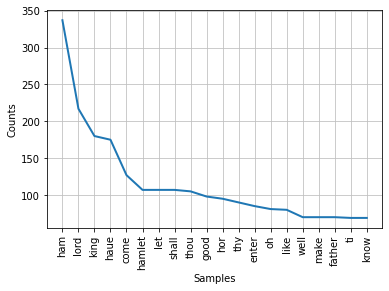

In [16]:
# plot the frequency distribution of the 20 most common words
freq_dist.plot(20)

Another interesting thing is make a lexical dispersion plot that plots the occurences of a word and how many words from the beginning it appears. To make the plot, first we need to turn our list of words into [nltk.Text](https://www.nltk.org/api/nltk.html#nltk.text.Text)-object and then use [`dispersion_plot()`](https://www.nltk.org/api/nltk.html#nltk.text.Text.dispersion_plot)-method.

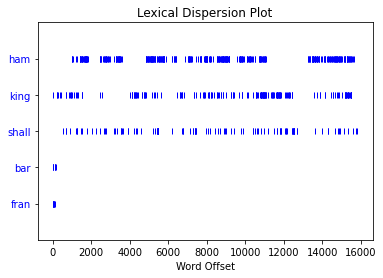

In [17]:
from nltk import Text

# Make a Text-object from our sample
disp_sample = Text(sample_lemmatized)

# Make the dispersion plot with a few words.
disp_sample.dispersion_plot(['ham','king','shall','bar','fran'])

That's it! We've managed to find out the most commonly used words by Shakespeare in Hamlet and learned how to check that how the words are distributed on the sample.

Can you figure out why the word "ham" appears to be the most frequently used word when stop words are removed? What are "bar" and "Fran" on the dispersion plot and why they appear only at the beginning of the book?

Try to find out the most common words for some other book yourself (from project Gutenberg, for example)!